In [1]:
def most_important_part():
    parts=('Look at Data', 'Program Computers', 'Run Statistics', 'Eat Pizza')
    return parts[0]

In [2]:
most_important_part_answer = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48728367/m-48723299'
assert most_important_part()=='Look at Data', 'A great stistician differs from an okay statistician by an ability to spend a lot of time *just* looking at data {}'.format(most_important_part_answer)

# Great vs Okay Statistician
 > A great statistician differs from an okay statistician by her ability to spend time looking at data

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:

size_v_cost = pd.DataFrame(dict(house_size=(1400,
                                      2400,
                                      1800,
                                      1900,
                                      1400,
                                      1100), 
                                cost=(pd.Series((98,
                                               168,
                                               126,
                                               133,
                                               91,
                                               77))*1000))) 

In [18]:
def linear_relationship_1(svc=None):
    """
    Reuses function from previous section
    :returns: True if there is a fixed $ amount per sq ft
    """
    svc = size_v_cost if svc is None else svc
    def valuing_houses_5(svc = None):
        svc = size_v_cost if svc is None else svc
        cost_per_sqft = svc.cost/svc.house_size
        
        different_costs_per_sqft = cost_per_sqft.value_counts()
        num_rates = len(different_costs_per_sqft)
        assert num_rates==1, 'There are {} costs per sq ft, cannot return just one'.format(num_rates)
        return cost_per_sqft.iloc[0]
    try:
        return valuing_houses_5(svc)
    except Exception as e:
        print(e)
        return False

In [19]:
linear_relationship_1_answer = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48717438/m-48739019'
assert  linear_relationship_1()==False, 'There is no linear relationship b/w data {}'.format(linear_relationship_1_answer)

There are 2 costs per sq ft, cannot return just one


In [20]:
def linear_relationship_1_clearer(svc=None):
    """
    Extracts the important to simply answer Sebastians question
    :returns: 'Is there a fixed dollar amount per square foot?'
    """
    svc= (size_v_cost if svc is None else svc)
    return len((svc.cost/svc.size).value_counts())==1

In [21]:
assert  linear_relationship_1_clearer()==False, 'There is no (i.e. False) linear relationship b/w data {}'.format(linear_relationship_1_answer)

In [41]:
def linear_relationship_1_sebastian_rationale(svc=None):
    """
    Sebastian explains, there are two size values
    Each of which have a distinct price value
    So a GROUP BY ... COUNT(DISTINCT ...) equivalent is another way of thinking about the problem
    https://stackoverflow.com/a/15411596/1175496
    Uses the handy groupby function existing in a DataFrame
        We can infer its behavior; you pass a parameter identifying the column you want to GROUPBY (duh)
        The values of that column become the index in a new DataFrameGroupBy object 
        (*not* to be confused with the result of calling ...count() on the result),
        Which produces a new DataFrame https://stackoverflow.com/a/10374456/1175496
        DataFrameGroupBy are http://pandas.pydata.org/pandas-docs/stable/api.html#groupby
        
        The DataFrameGroupBy still has accessible all other columns, in this case the only one is `cost`
        But imagine if the homes had a `color` column; we want to exclude `color` and focus on a *Series*
        Where house_size is our *index* and cost is our (array of *values*); we get this Series 
        by getting the .cost column
        
        This produces a SeriesGroupBy; just as indexing produces a lower-dimensional result
        (DataFrame --index--> Series ; DataFrameGroupBy --index--> SeriesGroupBy )
        
        
        Dont let the SeriesGroupBy fool you. It prints as if it's an Index, pre-determined. 
        But it is still capable of applying the aggregation step / i.e. Computations
        
    :returns: Is there a fixed dollar amount per square foot?
    """
    
    svc= (size_v_cost if svc is None else svc)
    svc.groupby('house_size').cost.nunique()
    

In [42]:
size_v_cost.groupby('house_size').groups, size_v_cost.groupby('house_size').indices

({1100: Int64Index([5], dtype='int64'),
  1400: Int64Index([0, 4], dtype='int64'),
  1800: Int64Index([2], dtype='int64'),
  1900: Int64Index([3], dtype='int64'),
  2400: Int64Index([1], dtype='int64')},
 {1100: array([5], dtype=int64),
  1400: array([0, 4], dtype=int64),
  1800: array([2], dtype=int64),
  1900: array([3], dtype=int64),
  2400: array([1], dtype=int64)})

In [43]:
size_v_cost.groupby('house_size').cost

In [46]:
size_v_cost.groupby('house_size').cost.groups

{1100: Int64Index([5], dtype='int64'),
 1400: Int64Index([0, 4], dtype='int64'),
 1800: Int64Index([2], dtype='int64'),
 1900: Int64Index([3], dtype='int64'),
 2400: Int64Index([1], dtype='int64')}

In [35]:
size_v_cost.groupby('house_size').count()#nunique()

,cost
house_size,
1100,1
1400,2
1800,1
1900,1
2400,1


In [37]:
size_v_cost.groupby('house_size').cost.nunique()

house_size
1100    1
1400    2
1800    1
1900    1
2400    1
Name: cost, dtype: int64

In [39]:
size_v_cost.groupby('house_size').cost.nunique()>1

house_size
1100    False
1400     True
1800    False
1900    False
2400    False
Name: cost, dtype: bool

In [50]:
(size_v_cost.groupby('house_size').cost.nunique()>1).sum()==0

False

In [54]:
has_repeats=pd.DataFrame(dict(house_size=(100, 110, 100), cost=(50, 52, 50)))

In [56]:
has_repeats.groupby('house_size').cost.nunique()

house_size
100    1
110    1
Name: cost, dtype: int64

In [70]:
size_v_cost_changed = size_v_cost.copy()
size_v_cost_changed.house_size.iloc[2]
size_v_cost_changed.cost==91000


0    False
1    False
2    False
3    False
4     True
5    False
Name: cost, dtype: bool

In [122]:
pd.Series(range(4,9)).iloc[pd.Series(range(4,9))==6]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [123]:
#Oh the Series doesnt use .iloc; or at least not for boolean *vectors*, maybe that works for boolean *arrays*
pd.Series(range(4,9))[pd.Series(range(4,9))==6]

2    6
dtype: int32

In [127]:
#Yep, it works with boolean *arrays*, which .`values` represents here:
pd.Series(range(4,9)).iloc[(pd.Series(range(4,9))==6).values]

2    6
dtype: int32

In [80]:
size_v_cost_changed = size_v_cost.copy()
size_v_cost_changed.house_size[size_v_cost_changed.cost==91000]=1300

def linear_relationship_2():
    
    return linear_relationship_1(size_v_cost_changed)

In [271]:
size_v_cost_changed.cost / size_v_cost_changed.house_size

0    70.0
1    70.0
2    70.0
3    70.0
4    70.0
5    70.0
dtype: float64

In [83]:
linear_relationship_2()

70.0

In [93]:
linear_relationship_2_answer = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48737251/m-48619986'
assert bool(linear_relationship_2())==True, 'Was expecting to find a fixed dollar  amount {}'.format(linear_relationship_2_answer)
assert linear_relationship_2()==70.0, 'Was expecting the amount to equal $70/sq ft  '

# Use this command to plot inline

In [94]:
%matplotlib inline

In [328]:
def scatter_plot(svc=None, highlight_size=2400, size=100):
    """
    Graphs sizes horizontally
    And costs vertically
    http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
    Cannot use pandas native .plot method, does not handle color keyword arg?
    """
    svc = size_v_cost_changed if svc is None else svc
    highlight_rows = (size_v_cost_changed.house_size==highlight_size)
    color = highlight_rows *1 # Wanted to shade the non-highlighted colors a bit darker, 
    #but realized that using `edgecolor` arg would also work + 0.5
    size = [size]*len(size_v_cost)
    kind='scatter'
    cmap='PuRd'
    plt.scatter(svc.house_size, svc.cost,c=color, s=size, cmap=cmap, edgecolor='black')
    
    expected_cost = svc[highlight_rows].cost.iloc[0]
    xy_point_to_annotate = tuple(size_v_cost[['house_size','cost']][(size_v_cost_changed.house_size==highlight_size)].iloc[0])
    
    plt.annotate(expected_cost, xy = xy_point_to_annotate, xytext = (0, 0), textcoords = 'offset points')
    
    # Was doing this in desperation, when I didnt understand that xy 
    # was a *point* in domain of data, not a *point* on range of the cartesian grid plt.show()
    #svc.plot('size', 'cost', c=color, s=[100]*len(size_v_cost), kind='scatter', cmap='PuRd')

In [242]:
tuple(size_v_cost[['house_size','cost']][(size_v_cost_changed.house_size==2400)].iloc[0])

(2400, 168000)

In [243]:
size_v_cost[['house_size','cost']][(size_v_cost_changed.house_size==2400)].iloc[0] + 100

house_size      2500
cost          168100
Name: 1, dtype: int64

In [244]:
(size_v_cost_changed.house_size==2400)

0    False
1     True
2    False
3    False
4    False
5    False
Name: house_size, dtype: bool

In [245]:
(size_v_cost_changed.house_size==2400)*1 + 0.5

0    0.5
1    1.5
2    0.5
3    0.5
4    0.5
5    0.5
Name: house_size, dtype: float64

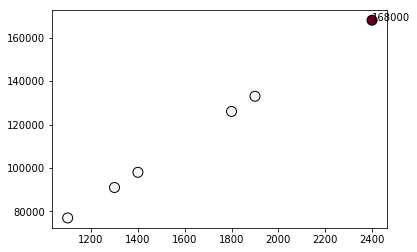

In [246]:
scatter_plot()#plt.scatter(size_v_cost_changed.size, size_v_cost_changed.cost, cmap='binary')

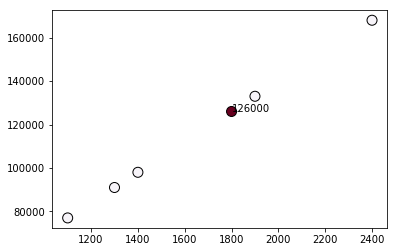

In [247]:
scatter_plot(highlight_size=1800)

In [248]:
def scatter_plots_3_picking_points():
    """
    'For the third house in the list'
    Third house in the list, using 0 indexed index location, is index 2
    """
    return scatter_plot(highlight_size=size_v_cost.iloc[2].house_size)

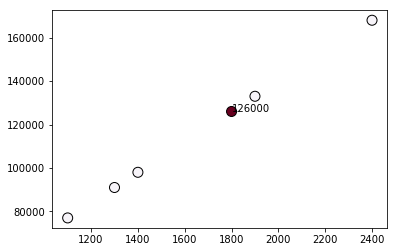

In [249]:
scatter_plots_3_picking_points()

In [250]:
size_v_cost

,cost,house_size
0,98000,1400
1,168000,2400
2,126000,1800
3,133000,1900
4,91000,1400
5,77000,1100


In [251]:
scatter_plot_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48646865/m-48693620'

In [252]:
def picking_points(svc=None, highlight_size=1800):
    
    svc = size_v_cost_changed if svc is None else svc
    scatter_plot(svc=svc, highlight_size=highlight_size)
    #print(plt.ylim())
    #plt.ylim(min(svc.cost), max(svc.cost))
    print(plt.axes())
    plt.plot([highlight_size, highlight_size], [plt.ylim()[0], plt.ylim()[1]], color='black', ls='dotted')#vlines(1900,0,18000)

((0.0, 1.0), (0.0, 1.0))
Axes(0.125,0.125;0.775x0.755)


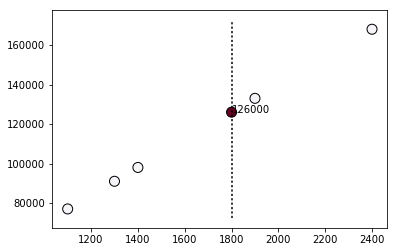

In [253]:
print((plt.ylim(), plt.xlim()))
picking_points_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48717439/m-48619987'
picking_points()

In [468]:
def linear_ref_line(svc=None, size=100, zmin=1, zmax=1):
    """
    When a line governs the relationship of two datapoints; 
    the data is called 'linear'
    Linearity is a rare occurrence in statistics
    """
    
    svc = size_v_cost_changed if svc is None else svc
    scatter_plot(svc, size=size)
    #print(plt.ylim())
    #plt.ylim(min(svc.cost), max(svc.cost))
    plt.plot([min(svc.house_size)*zmin,  max(svc.house_size)*zmax], [min(svc.cost)*zmin, max(svc.cost)*zmax], color='black', ls='dotted')#vlines(1900,0,18000)

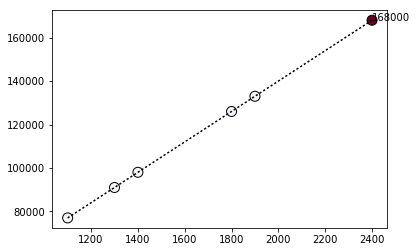

In [469]:
linear_ref_line()

In [261]:
size_v_cost_changed_2 = pd.DataFrame(dict(house_size=pd.Series((17,
                                                21,
                                                19,
                                                13,
                                                16,
                                                22
                                                ))*100, 
                                cost=(pd.Series((51,
                                               63,
                                               57,
                                               39,
                                               48,
                                               66))*1000))) 

*Can indeed draw a line through these datapoints:*

In [266]:
def fixed_price(svc=None):
    svc = svc if svc is not None else size_v_cost_changed_2
    linear_ref_line(svc)
def fixed_price_fixed_cost_per_sqft(svc=None):
    svc = svc if svc is not None else size_v_cost_changed_2
    fixed_price(svc)
    return linear_relationship_1(svc)
    

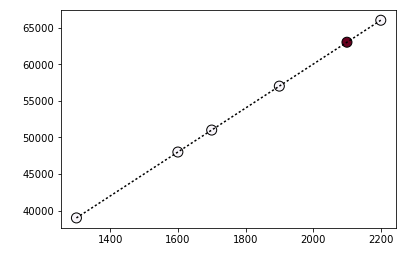

In [268]:

assert fixed_price_fixed_cost_per_sqft() == 30; 'Price should be 30'
fixed_price_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48696652/m-48676929'

In [270]:
size_v_cost_changed_2.cost/size_v_cost_changed_2.house_size

0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
5    30.0
dtype: float64

In [363]:
size_v_cost_changed_3 = size_v_cost_changed_2.copy()
size_v_cost_changed_3.cost = pd.Series((53, 65, 59, 41, 50, 68))*1000
def price_per_square_foot(svc=None):
    """"
    :returns: Do we believe there is a fixed price per square foot
    """
    svc = svc if svc is not None else size_v_cost_changed_3
    return linear_relationship_1(svc)
    

In [380]:
size_v_cost_changed_3

,cost,house_size
0,53000,1700
1,65000,2100
2,59000,1900
3,41000,1300
4,50000,1600
5,68000,2200


In [384]:
size_v_cost_changed_3.sort_values(by=['house_size']).cost/size_v_cost_changed_3.sort_values(by=['house_size']).house_size

3    31.538462
4    31.250000
0    31.176471
2    31.052632
1    30.952381
5    30.909091
dtype: float64

In [275]:
size_v_cost_changed_3.cost/size_v_cost_changed_3.house_size

0    31.176471
1    30.952381
2    31.052632
3    31.538462
4    31.250000
5    30.909091
dtype: float64

In [273]:
assert price_per_square_foot()==False, 'There is not a fixed price per sq ft, even though you can draw a line connecting all points'
price_per_square_foot_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48696652/m-48619990'


There are 6 costs per sq ft, cannot return just one


In [325]:
def make_your_own_2(size=100):
    """
    :returns: Scatter plot helps us visualize if data is linear
    """
    return linear_ref_line(size_v_cost_changed_3,size=size)


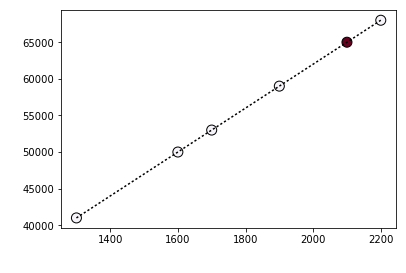

In [324]:
make_your_own_2()

In [106]:
make_your_own_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48733278/m-48634706'

In [296]:
def find_the_constant(svc=None):
    """
    Uses np.linalg.listsq
     > Return the least-squares solution to a linear matrix equation.
    As described here:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
    :returns: array
    0-index is $/sqft
    1-index is constant $ amount
    """
    svc = svc if svc is not None else size_v_cost_changed_3
    x = svc.house_size
    y = svc.cost
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(A, y)

In [297]:
np.vstack([size_v_cost_changed_3.house_size, np.ones(len(size_v_cost_changed_3.house_size))]).T

array([[  1.70000000e+03,   1.00000000e+00],
       [  2.10000000e+03,   1.00000000e+00],
       [  1.90000000e+03,   1.00000000e+00],
       [  1.30000000e+03,   1.00000000e+00],
       [  1.60000000e+03,   1.00000000e+00],
       [  2.20000000e+03,   1.00000000e+00]])

#  Using the "allclose" method
### http://stackoverflow.com/a/10580782/1175496

In [289]:
import numpy

In [299]:
slope, y_intersect = find_the_constant(size_v_cost_changed_3)[0]
assert numpy.isclose(slope, 30), 'While individual ratios are different, the slope calculated with least-squares \
method is approximately 30 , same slope we expected when ratios were consistent'

In [298]:
assert np.allclose(find_the_constant(size_v_cost_changed_3)[0], np.array((30.,2000.))), 'The slope is $30 per sq ft, the y-intersect is $2,000'
find_the_constant_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48646867/e-48702499/m-48727300'

In [410]:
size_v_cost_changed_4

,cost,house_size
0,53000,1700
1,44000,2100
2,59000,1900
3,82000,1300
4,50000,1600
5,68000,2200


In [408]:
find_the_constant(size_v_cost_changed_3)

(array([   30.,  2000.]),
 array([  8.24111997e-23]),
 2,
 array([  4.47213661e+03,   4.09877971e-01]))

In [304]:
find_the_constant(size_v_cost_changed_4)

(array([    24.82142857,  16154.76190476]),
 array([  6.85815476e+08]),
 2,
 array([  4.47213661e+03,   4.09877971e-01]))

In [306]:
x = numpy.array([0, 1, 2, 3])
y = numpy.array([-1, 0.2, 0.9, 2.1])

In [307]:
x/y

array([-0.        ,  5.        ,  2.22222222,  1.42857143])

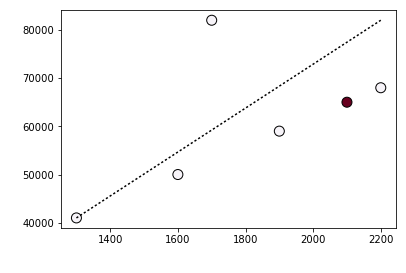

In [309]:
is_it_linear()

theredpea [9:12 AM] 
Hi, maths! I'm answering a Udacity question about a series of `x,y` points. Sebastian draws some points that are roughly linear, and asks "are they linear", and since a line could be drawn through the points in matplotlib, 

I understand his answer "yes". 

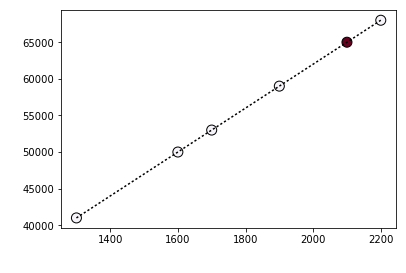

In [313]:
make_your_own_2()

However, he changes just the y-coordinate one point significantly, He asks "are they linear", and and since a single line can **no longer be drawn through the points in matplotlib**, I understand his answer "no".

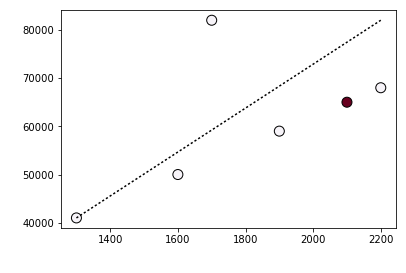

In [314]:
is_it_linear()

But both these answers still rely on my visual judgment of a graph, and how well the line fits. If I were extremely discriminating, and I *zoomed* on my first graph, I would notice the line does not *exactly* pass through all points, so I could argue the data is *not* linear.


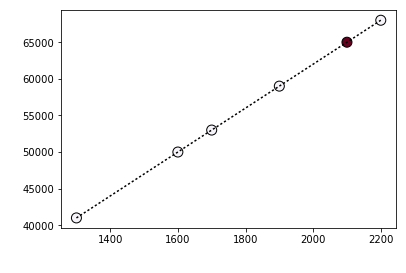

In [317]:
make_your_own_2()

[1599.98, 1600.02, 49999.98, 50000.02]

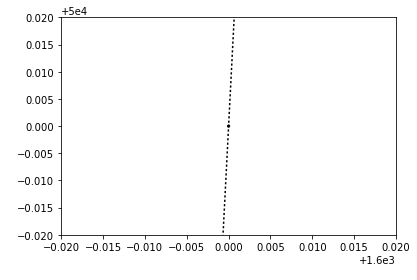

In [346]:
make_your_own_2(size=5)
#Zoom in:

#plt.axis([1598, 1602, 49800, 50200])
#plt.axis([1599.95, 1600.05, 49999.5, 50000.5])
plt.axis([1599.98, 1600.02, 49999.98, 50000.02])
#Ugh, very hard to *see*.... that they don't intersect!

In [444]:
#Well  I can do it more precisely by just comparing the point (actual value)
#With the expected value (i.e. what the y=mx + b  would produce)
np.dot(find_the_constant(size_v_cost_changed_3)[0],np.array([1900, 1]))

58999.999999999964

In [443]:
size_v_cost_changed_3[size_v_cost_changed_3.house_size==1900].iloc[0].cost

59000

Yes the difference between those numbers is small, but there is a difference!
But is it just floating-point math difference; 1e-8 is negligible; `np.isclose` would say *True*!

In [360]:
np.dot(find_the_constant(size_v_cost_changed_3)[0],np.array([1600, 1]))==size_v_cost_changed_3[size_v_cost_changed_3.house_size==1600].iloc[0].cost

False

In [362]:
#And the difference is more exaggerated elsewhere
def diff_than_expected(at_size=1600):
    return np.dot(find_the_constant(size_v_cost_changed_3)[0],np.array([at_size, 1])) - size_v_cost_changed_3[size_v_cost_changed_3.house_size==at_size].iloc[0].cost

In [370]:
#Ack, they're all pretty small!
diff_than_expected(), diff_than_expected(2100), diff_than_expected(1700)

(-2.9103830456733704e-11, -3.637978807091713e-11, -2.9103830456733704e-11)

What is a good way to quantify this measure of "linearness", instead of relying on my human judgement? 
I can check the value of residuals, which is super-small in the first case, but a big number in the second case:

In [371]:
find_the_constant(size_v_cost_changed_3)[1]

array([  8.24111997e-23])

In [372]:
find_the_constant(size_v_cost_changed_4)[1]

array([  6.85815476e+08])

Or maybe I could use pearson correlation coefficient? https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [391]:
size_v_cost_changed_3_sorted = size_v_cost_changed_3.sort_values(by='house_size')

In [394]:
size_v_cost_changed_3_sorted['persqft'] = size_v_cost_changed_3_sorted.cost/size_v_cost_changed_3_sorted.house_size; size_v_cost_changed_3_sorted

,cost,house_size,persqft
3,41000,1300,31.538462
4,50000,1600,31.250000
0,53000,1700,31.176471
2,59000,1900,31.052632
1,65000,2100,30.952381
5,68000,2200,30.909091


In [399]:
import scipy.stats
#https://stackoverflow.com/a/6665059/1175496
scipy.stats.pearsonr(size_v_cost_changed_3_sorted.house_size, size_v_cost_changed_3_sorted.cost)
#Holy hell it gets a perfect correlation score!?

(1.0, 0.0)

In [418]:
#sanity check
#A value is trying to be set on a copy of a slice from a DataFrame -- because _sorted is the copy
#size_v_cost_changed_3_sorted_tweak = size_v_cost_changed_3_sorted.copy()
size_v_cost_changed_3_tweak = size_v_cost_changed_3.copy()
#size_v_cost_changed_3_sorted_tweak.cost.iloc[(size_v_cost_changed_3_sorted_tweak.house_size==2200).values]=68005
size_v_cost_changed_3_tweak.cost[size_v_cost_changed_3_tweak.house_size==2200]=68005


In [419]:
size_v_cost_changed_3_tweak

,cost,house_size
0,53000,1700
1,65000,2100
2,59000,1900
3,41000,1300
4,50000,1600
5,68005,2200


In [421]:

scipy.stats.pearsonr(size_v_cost_changed_3_tweak.house_size, size_v_cost_changed_3_tweak.cost)

(0.99999998642141197, 2.7656707815211843e-16)

In [425]:

scipy.stats.pearsonr((-2,-1,0,1,2), (2, 1, 2, 3, 2))

(0.44721359549995793, 0.45018485575210093)

In [430]:
np.linalg.lstsq(np.vstack([np.array((-2,-1,0,1,2)), np.ones(len(np.array((-2,-1,0,1,2))))]).T, np.array((2, 1, 2, 3, 2)))

(array([ 0.2,  2. ]), array([ 1.6]), 2, array([ 3.16227766,  2.23606798]))

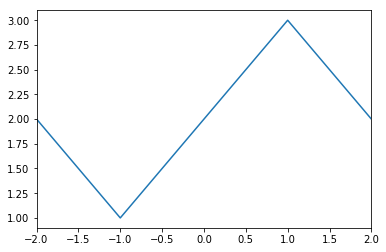

In [440]:
pd.Series(index=(-2,-1,0,1,2), data=(2, 1, 2, 3, 2)).plot()


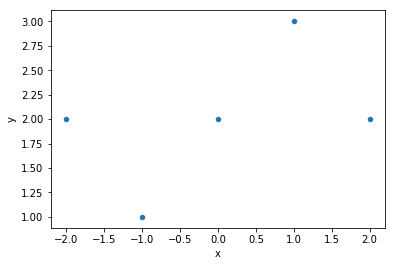

In [445]:
pd.DataFrame(dict(x=(-2,-1,0,1,2), y=(2, 1, 2, 3, 2))).plot(kind='scatter', x='x', y='y')


# Realization
Fixed cost per sq ft, is essentially asking if linear & intercept is 0;

Whereas linearity is just asking if linear.


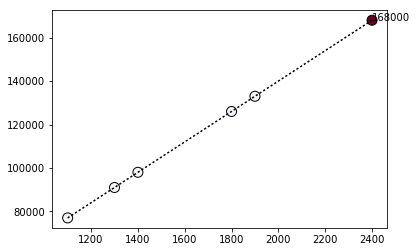

In [467]:
linear_ref_line(size_v_cost_changed, zmin=-100, zmax=-100)

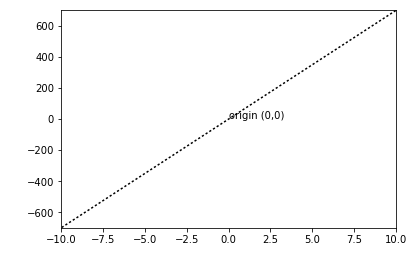

In [482]:
#zmin and zmax only work because they are scaling "vectors"
#vectors, by definition, exist in relation to the origin. 
#And that's also what I'm demonstrating, that you can only see the line go through the origin
#When there is a fixed cost per sqft
linear_ref_line(size_v_cost_changed, zmin=-1, zmax=2)
plt.axis([-10, 10, -linear_relationship_1(size_v_cost_changed)*10,  linear_relationship_1(size_v_cost_changed)*10])
plt.plot(x=(0,), y=(0,),size=100, type='scatter')
plt.annotate('origin (0,0)', xy=(0,0))


In [460]:
size_v_cost_changed.cost/size_v_cost_changed.house_size

0    70.0
1    70.0
2    70.0
3    70.0
4    70.0
5    70.0
dtype: float64

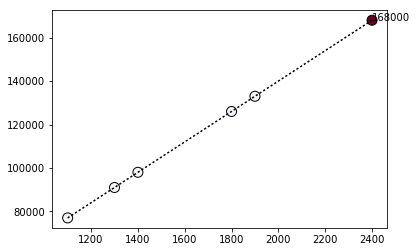

In [453]:
linear_ref_line(size_v_cost_changed)

In [489]:
size_v_cost_changed_4 = size_v_cost_changed_3.copy()
size_v_cost_changed_4.cost[size_v_cost_changed_4.house_size==2100]=44000
size_v_cost_changed_4.cost[size_v_cost_changed_4.house_size==1300]=82000
#def is_it_linear(svc):
size_v_cost_changed_4   
def is_it_linear(svc=None):
    svc = svc if svc is not None else size_v_cost_changed_4
    return linear_ref_line(svc)

In [490]:
size_v_cost_changed_4

,cost,house_size
0,53000,1700
1,44000,2100
2,59000,1900
3,82000,1300
4,50000,1600
5,68000,2200


In [495]:
#No, these points do not fall on a line; 
#size_v_cost_changed_4.size==1300 | size_v_cost_changed_4.size==2100
def congratulations(svc=None):
    svc = svc if svc is not None else size_v_cost_changed_4
    plt.scatter(svc.house_size, svc.cost, s=100*len(svc), c= ((svc.house_size==1300) | (svc.house_size==2100))*1, edgecolor='black')

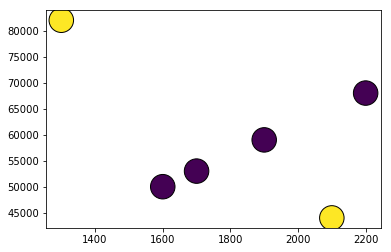

In [496]:
congratulations()

In [502]:
zero_to_five = pd.Series(range(0,6))
x_and_two_x = pd.DataFrame(dict(x=zero_to_five.apply(lambda x:x), two_x=zero_to_five.apply(lambda x:2*x)))

In [503]:
x_and_two_x

,two_x,x
0,0,0
1,2,1
2,4,2
3,6,3
4,8,4
5,10,5
